<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/transfer_learning_exercises_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠  Exercises

**Q1:** Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?

**Q2:** Recreate our first model (the feature extraction model) with mixed_precision turned on.
- Does it make the model train faster?
- Does it effect the accuracy or performance of our model?
- What's the advatanges of using mixed_precision training?

In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2021-08-21 15:52:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   248MB/s    in 8.0s    

2021-08-21 15:52:44 (193 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [3]:
import zipfile

zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

for root, dirname, filename in os.walk("101_food_classes_10_percent"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in '{root}'")

There are 2 directories and 0 images in '101_food_classes_10_percent'
There are 101 directories and 0 images in '101_food_classes_10_percent/test'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/escargots'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/fish_and_chips'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/spaghetti_bolognese'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chocolate_cake'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/donuts'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/ice_cream'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chicken_quesadilla'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/strawberry_shortcake'
There are 0 directories and 250 images in '101_food_classes_10_percent/test/bibimbap'
There are 0 directories and 250 im

In [5]:
len(os.listdir("101_food_classes_10_percent/train/"))

101

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

train_data = image_dataset_from_directory(train_dir,
                                          label_mode="categorical",
                                          image_size=(224, 224))
test_data = image_dataset_from_directory(test_dir,
                                         label_mode="categorical",
                                         image_size=(224, 224),
                                         shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [7]:
class_names = train_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [8]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def plot_random_9_image():
  plt.figure(figsize=(14,10))
  for i in range(9):
    plt.subplot(3,3, i+1)
    class_name = random.choice(class_names)
    file_path = train_dir + class_name
    
    img_name = random.choice(os.listdir(file_path))
    img = mpimg.imread(file_path + "/" + img_name)
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"{class_name} \nshape: {img.shape}")

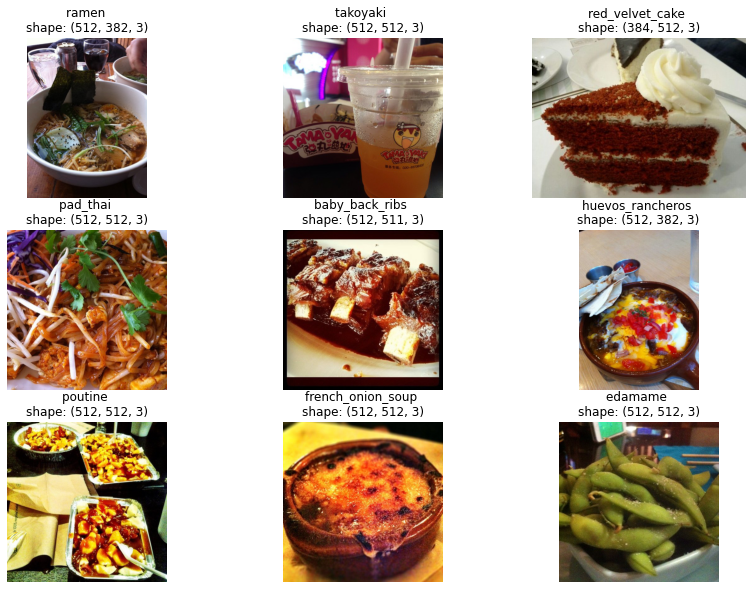

In [9]:
plot_random_9_image()

## **Q1**

Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?




### Feature Extraction Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomHeight(0.2)
])

In [11]:
from tensorflow.keras import layers

#load base model 
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# create "data_augmented" model
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_avarage_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model = tf.keras.Model(inputs, outputs)

# Compile Model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [12]:
# Create checkpoint
checkpoint_path = "model_checkpoints/feature_extraction_augmented_model/"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor="val_accuracy",
                                                         save_best_only=True,
                                                         save_weights_only=True)

In [13]:
feature_extraction_augmented_history = model.fit(train_data,
                                                 epochs=5,
                                                 validation_data=test_data,
                                                 validation_steps=int(0.15*len(test_data)),
                                                 callbacks = [checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 109s 313ms/step - loss: 3.4729 - accuracy: 0.2490 - val_loss: 2.6199 - val_accuracy: 0.4293
Epoch 2/5
237/237 [==============================] - 58s 244ms/step - loss: 2.3513 - accuracy: 0.4582 - val_loss: 2.2483 - val_accuracy: 0.4574
Epoch 3/5
237/237 [==============================] - 53s 222ms/step - loss: 1.9764 - accuracy: 0.5321 - val_loss: 2.0623 - val_accuracy: 0.4899
Epoch 4/5
237/237 [==============================] - 50s 209ms/step - loss: 1.7629 - accuracy: 0.5696 - val_loss: 1.9713 - val_accuracy: 0.5026
Epoch 5/5
237/237 [==============================] - 46s 194ms/step - loss: 1.5977 - accuracy: 0.6058 - val_loss: 1.9524 - val_accuracy: 0.5013


In [14]:
feature_extraction_augmented_evaluate = model.evaluate(test_data)
feature_extraction_augmented_evaluate

790/790 [==============================] - 57s 72ms/step - loss: 1.7163 - accuracy: 0.5553


[1.716349482536316, 0.5552871227264404]

### Fine-tuned Model

In [15]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable=False

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avarage_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 101)               129381    
Total params: 4,178,952
Trainable params: 1,022,613
Non-trainable params: 3,156,339
_________________________________________________________________


In [17]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
sequential True
efficientnetb0 True
global_avarage_pooling_layer True
output_layer True


In [18]:
for i, layer in enumerate(model.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

fine_tune_augmented_history = model.fit(train_data,
                                        initial_epoch=feature_extraction_augmented_history.epoch[-1],
                                        epochs= 10,
                                        validation_data=test_data,
                                        validation_steps=int(0.15*len(test_data)))

Epoch 5/10
237/237 [==============================] - 54s 200ms/step - loss: 1.3275 - accuracy: 0.6553 - val_loss: 1.9007 - val_accuracy: 0.5069
Epoch 6/10
237/237 [==============================] - 45s 189ms/step - loss: 1.1939 - accuracy: 0.6830 - val_loss: 1.9037 - val_accuracy: 0.5140
Epoch 7/10
237/237 [==============================] - 41s 173ms/step - loss: 1.1071 - accuracy: 0.7129 - val_loss: 1.8685 - val_accuracy: 0.5241
Epoch 8/10
237/237 [==============================] - 42s 176ms/step - loss: 1.0203 - accuracy: 0.7259 - val_loss: 1.8966 - val_accuracy: 0.5175
Epoch 9/10
237/237 [==============================] - 38s 161ms/step - loss: 0.9394 - accuracy: 0.7504 - val_loss: 1.8705 - val_accuracy: 0.5267
Epoch 10/10
237/237 [==============================] - 39s 162ms/step - loss: 0.8743 - accuracy: 0.7578 - val_loss: 1.9210 - val_accuracy: 0.5132


In [20]:
fine_tune_augmented_evaluate = model.evaluate(test_data)
fine_tune_augmented_evaluate 

790/790 [==============================] - 56s 71ms/step - loss: 1.6512 - accuracy: 0.5760


[1.6511523723602295, 0.5760396122932434]

In [21]:
# Compare history 
def compare_historys(original_history, new_history, initial_epochs=5):
  #original_history
  acc = original_history.history["accuracy"]
  val_acc = original_history.history["val_accuracy"]
  loss = original_history.history["loss"]
  val_loss = original_history.history["val_loss"]

  new_acc = acc + new_history.history["accuracy"]
  new_val_acc = val_acc + new_history.history["val_accuracy"]
  
  new_loss = loss + new_history.history["loss"]
  new_val_loss = val_loss + new_history.history["val_loss"]

  epochs = [i for i in range(1, len(new_acc)+1)]

  plt.figure()
  plt.plot(epochs, new_acc, label="accuracy")
  plt.plot(epochs, new_val_acc, label="val_accuracy")
  plt.axvline(x=initial_epochs, label="Start Fine Tuning")
  plt.legend()
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")

  plt.figure()
  plt.plot(epochs, new_loss, label="loss")
  plt.plot(epochs, new_val_loss, label="val_loss")
  plt.axvline(x=initial_epochs, label="Start Fine Tuning")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

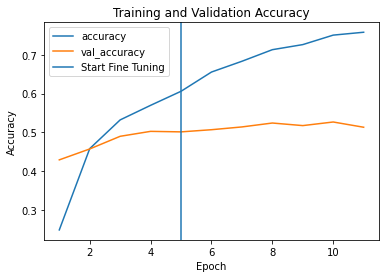

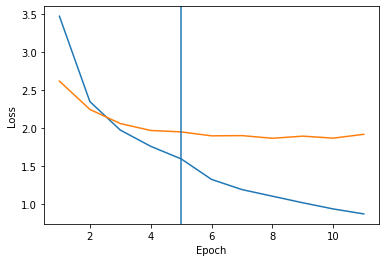

In [22]:
# These graphs show testing on 15% test data
compare_historys(feature_extraction_augmented_history, fine_tune_augmented_history)

In [23]:
# using 100% test data 
print("Feature extraction model 'loss':",feature_extraction_augmented_evaluate[0])
print("Feature extraction model 'accuracy':",feature_extraction_augmented_evaluate[1])

Feature extraction model 'loss': 1.716349482536316
Feature extraction model 'accuracy': 0.5552871227264404


In [24]:
# using 100% test data 
print("Fine tuned model 'loss':", fine_tune_augmented_evaluate[0])
print("Fine tuned model 'accuracy':", fine_tune_augmented_evaluate[1])

Fine tuned model 'loss': 1.6511523723602295
Fine tuned model 'accuracy': 0.5760396122932434


## **Q2**

Recreate our first model (the feature extraction model) with mixed_precision turned on. 
- Does it make the model train faster? 
- Does it effect the accuracy or performance of our model? 
- What's the advatanges of using mixed_precision training?

In [25]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [26]:
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

Compute dtype: float16
Variable dtype: float32


In [27]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_pooling_layer")(x)

outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_q2 = tf.keras.Model(inputs, outputs)

model_q2.compile(loss="categorical_crossentropy",
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

feature_extraction_model_q2_history = model_q2.fit(train_data,
                                                   epochs=5,
                                                   validation_data=test_data,
                                                   validation_steps=int(0.15* len(test_data)))

Epoch 1/5
237/237 [==============================] - 36s 130ms/step - loss: 3.4751 - accuracy: 0.2461 - val_loss: 2.6933 - val_accuracy: 0.3946
Epoch 2/5
237/237 [==============================] - 26s 109ms/step - loss: 2.3656 - accuracy: 0.4556 - val_loss: 2.2653 - val_accuracy: 0.4571
Epoch 3/5
237/237 [==============================] - 26s 107ms/step - loss: 1.9674 - accuracy: 0.5364 - val_loss: 2.0724 - val_accuracy: 0.4831
Epoch 4/5
237/237 [==============================] - 25s 105ms/step - loss: 1.7464 - accuracy: 0.5805 - val_loss: 2.0006 - val_accuracy: 0.4876
Epoch 5/5
237/237 [==============================] - 25s 103ms/step - loss: 1.6074 - accuracy: 0.6057 - val_loss: 1.9383 - val_accuracy: 0.4958


In [28]:
model_q2.evaluate(test_data)

790/790 [==============================] - 52s 65ms/step - loss: 1.7139 - accuracy: 0.5539


[1.713923692703247, 0.5539010167121887]

In [29]:
feature_extraction_augmented_evaluate

[1.716349482536316, 0.5552871227264404]

# Predict and visualize image

In [30]:
def load_and_prep_image(filename, image_shape=224, scaling =False):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, size=(image_shape, image_shape))

  if scaling:
    return img/255.
  else:
    return img

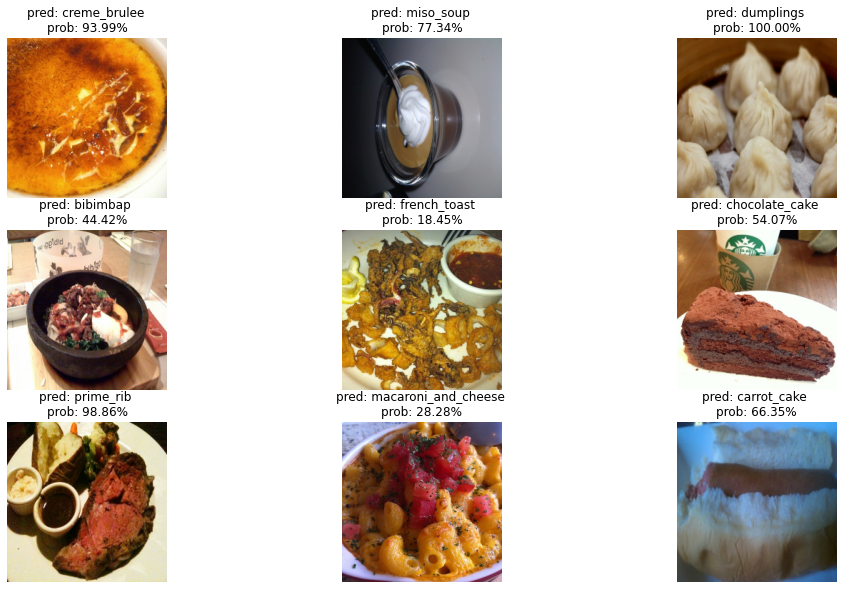

In [31]:
import os 
import random

plt.figure(figsize=(17,10))

for i in range(9):
  plt.subplot(3,3, i+1)

  class_name = random.choice(class_names)
  file_name = random.choice(os.listdir(test_dir + class_name)) 
  
  target_img = test_dir + class_name + "/" + file_name
  img = load_and_prep_image(target_img)
  
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class} \nprob: {pred_prob.max()*100:.2f}%")
  plt.axis(False)

# Finding the most wrong predictions

In [40]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [41]:
pred_probs = model.predict(test_data)
pred_classes = pred_probs.argmax(axis=1)

pred_classes[:10]

array([ 0,  0,  0,  8, 29, 78, 29, 46,  9,  0])

In [42]:
file_paths = []

for path in test_data.list_files(test_dir + "*/*.jpg", shuffle=False):

  file_paths.append(path.numpy())

file_paths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [43]:
import pandas as pd

pred_df = pd.DataFrame({
    "img_path":file_paths,
    "y_true": y_labels,
    "y_pred": pred_classes,
    "pred_conf": pred_probs.max(axis=1),
    "y_true_classname": [class_names[i] for i in y_labels],
    "y_pred_classname": [class_names[i] for i in pred_classes]
})
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.494966,apple_pie,apple_pie
1,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.984687,apple_pie,apple_pie
2,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.327285,apple_pie,apple_pie
3,b'101_food_classes_10_percent/test/apple_pie/1...,0,8,0.303366,apple_pie,bread_pudding
4,b'101_food_classes_10_percent/test/apple_pie/1...,0,29,0.246007,apple_pie,cup_cakes


In [44]:
pred_df["pred_correct"] = pred_df.y_true == pred_df.y_pred
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.494966,apple_pie,apple_pie,True
1,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.984687,apple_pie,apple_pie,True
2,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.327285,apple_pie,apple_pie,True
3,b'101_food_classes_10_percent/test/apple_pie/1...,0,8,0.303366,apple_pie,bread_pudding,False
4,b'101_food_classes_10_percent/test/apple_pie/1...,0,29,0.246007,apple_pie,cup_cakes,False


In [45]:
pred_df[pred_df["pred_correct"]==False].sort_values("pred_conf", ascending=False)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
15826,b'101_food_classes_10_percent/test/macarons/19...,63,29,0.999889,macarons,cup_cakes,False
23631,b'101_food_classes_10_percent/test/strawberry_...,94,83,0.999869,strawberry_shortcake,red_velvet_cake,False
23797,b'101_food_classes_10_percent/test/sushi/16593...,95,86,0.999486,sushi,sashimi,False
18001,b'101_food_classes_10_percent/test/pancakes/10...,72,67,0.999348,pancakes,omelette,False
15883,b'101_food_classes_10_percent/test/macarons/26...,63,29,0.999049,macarons,cup_cakes,False
...,...,...,...,...,...,...,...
3821,b'101_food_classes_10_percent/test/ceviche/211...,15,77,0.100983,ceviche,pork_chop,False
14845,b'101_food_classes_10_percent/test/lasagna/257...,59,37,0.100543,lasagna,filet_mignon,False
17947,b'101_food_classes_10_percent/test/paella/3709...,71,18,0.097498,paella,chicken_curry,False
22415,b'101_food_classes_10_percent/test/shrimp_and_...,89,41,0.096893,shrimp_and_grits,french_onion_soup,False


In [46]:
top_100_wrong = pred_df[pred_df["pred_correct"]==False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
15826,b'101_food_classes_10_percent/test/macarons/19...,63,29,0.999889,macarons,cup_cakes,False
23631,b'101_food_classes_10_percent/test/strawberry_...,94,83,0.999869,strawberry_shortcake,red_velvet_cake,False
23797,b'101_food_classes_10_percent/test/sushi/16593...,95,86,0.999486,sushi,sashimi,False
18001,b'101_food_classes_10_percent/test/pancakes/10...,72,67,0.999348,pancakes,omelette,False
15883,b'101_food_classes_10_percent/test/macarons/26...,63,29,0.999049,macarons,cup_cakes,False
...,...,...,...,...,...,...,...
3647,b'101_food_classes_10_percent/test/carrot_cake...,14,55,0.978139,carrot_cake,hot_dog,False
20214,b'101_food_classes_10_percent/test/pulled_pork...,80,53,0.977947,pulled_pork_sandwich,hamburger,False
14199,b'101_food_classes_10_percent/test/huevos_ranc...,56,54,0.977907,huevos_rancheros,hot_and_sour_soup,False
10731,b'101_food_classes_10_percent/test/french_toas...,42,97,0.977781,french_toast,takoyaki,False


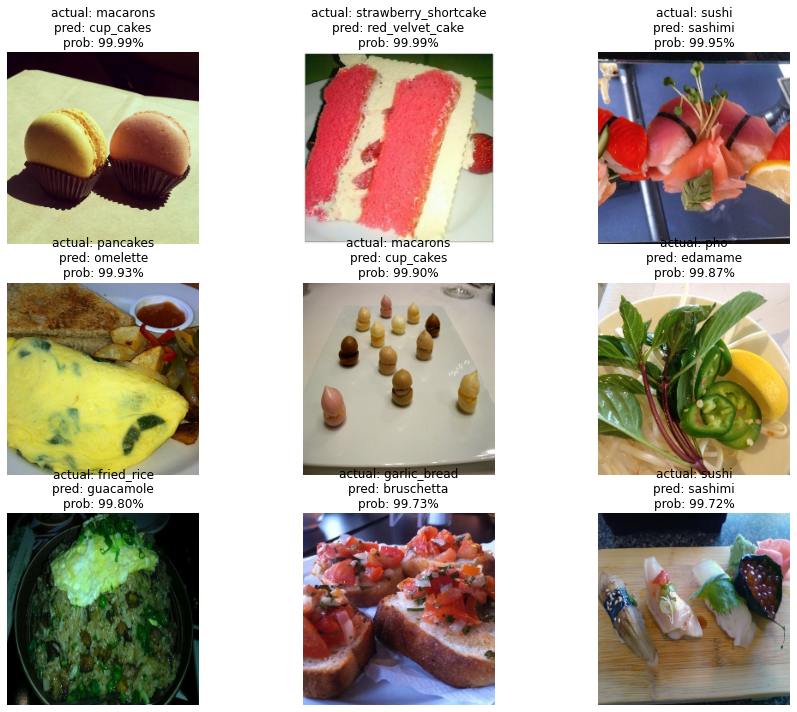

In [47]:
images_to_view = 9
start_index = 0

plt.figure(figsize=(15,12))
for i, row in enumerate(top_100_wrong[start_index: start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1])
  _, _, _, _, pred_prob, y_true, y_pred, _ = row
  plt.imshow(img/255.)
  plt.title(f"actual: {y_true}\npred: {y_pred}\nprob: {pred_prob*100:.2f}%")
  plt.axis(False)

# Predict custom images of food

In [49]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

zip_ref = zipfile.ZipFile("custom_food_images.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-21 16:16:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip.1’

custom_food_images. 100%[===================>]  12.58M  --.-KB/s    in 0.1s    

2021-08-21 16:16:58 (113 MB/s) - ‘custom_food_images.zip.1’ saved [13192985/13192985]



In [50]:
custom_food_images = ["custom_food_images/"+image for image in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/chicken_wings.jpeg',
 'custom_food_images/pizza-dad.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/sushi.jpeg']

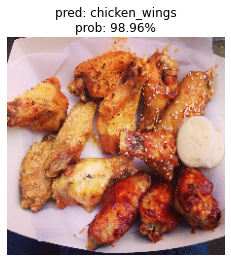

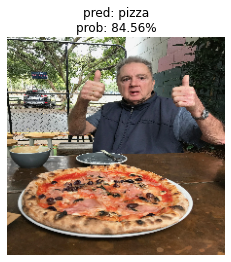

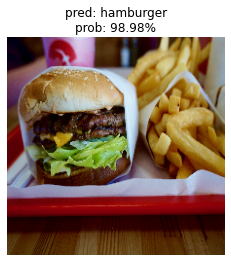

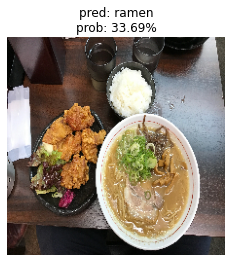

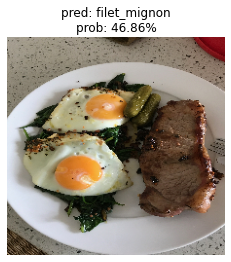

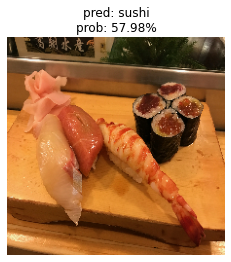

In [53]:
for img in custom_food_images:
  img = load_and_prep_image(img)
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}\nprob: {pred_prob.max()*100:.2f}%")
  plt.axis(False)